1. 데이터 준비, 패키지 설치, 한글 폰트 설치

In [1]:
%matplotlib inline

import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

!apt-get -qq -y install fonts-nanum > /dev/null
#fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'



fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',
    name='NanumGothic')
fm.fontManager.ttflist.insert(0, fe)
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'})


In [ ]:
import os
os.kill(os.getpid(), 9)

In [2]:

import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm


mpl.rcParams['axes.unicode_minus'] = False

fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',
    name='NanumGothic')
fm.fontManager.ttflist.insert(0, fe)
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'})

사이버 범죄 데이터 불러오기


In [3]:
import pandas as pd
import numpy as np

crime_data_path = '/content/경찰청_연도별 사이버 범죄 통계 현황_08_31_2020.csv'
crime_data = pd.read_csv(crime_data_path, encoding='cp949')
crime_data.head()

,연도,구분,해킹(계정도용),해킹(단순침입),해킹(자료유출),해킹(자료훼손),서비스거부공격,악성프로그램(랜섬웨어),악성프로그램(기타),기타 정보통신망 침해형 범죄,...,사이버 음란물(일반음란물),사이버 음란물(아동음란물),사이버 음란물(불법촬영물유포),사이버 도박(스포츠토토),사이버 도박(경마 경륜 경정),사이버 도박(카지노),사이버 도박(기타),사이버 명예훼손(모욕),사이버 스토킹,기타 불법 컨텐츠
0,2020,발생건수,1067,1621,130,358,25,24,145,974,...,1366,2623,842.0,3222,332,429,1709,19388,42,204
1,2020,검거건수,117,217,46,168,10,0,81,272,...,987,2398,678.0,3154,315,382,1585,12638,39,126
2,2019,발생건수,751,1458,114,341,35,24,246,669,...,1769,756,165.0,3078,366,366,1536,16633,25,251
3,2019,검거건수,118,277,41,120,14,0,189,248,...,1436,589,139.0,3017,352,353,1440,11632,20,176
4,2018,발생건수,721,1003,114,340,20,33,86,571,...,2661,1172,NaN,1629,276,176,931,15926,60,208


연도별 범죄 유형 데이터를 데이터프레임으로 만들고 유형별로 합계를 재구성
(그래프에서 보여줄 유형별 합계)

In [52]:
crime_df = crime_data[['연도','구분','해킹(계정도용)','해킹(단순침입)','해킹(자료유출)','서비스거부공격','악성프로그램(랜섬웨어)','악성프로그램(기타)','기타 정보통신망 침해형 범죄','사이버사기(직거래)','사이버사기(쇼핑몰)','사이버사기(게임)','사이버사기(이메일 무역사기)','사이버사기(기타)','사이버금융범죄(피싱)','사이버금융범죄(메신저이용사기)','사이버금융범죄(기타)','개인위치정보 침해','사이버저작권침해','기타 정보통신망 이용형 범죄','사이버 음란물(일반음란물)','사이버 음란물(아동음란물)','사이버 음란물(불법촬영물유포)','사이버 도박(스포츠토토)','사이버 도박(경마 경륜 경정)','사이버 도박(카지노)','사이버 도박(기타)','사이버 명예훼손(모욕)','사이버 스토킹','기타 불법 컨텐츠']]



crime_df = crime_df.sort_values(by='연도', ascending=True).fillna(0)

crime_df['해킹(전체)'] = crime_df['해킹(계정도용)'].map(int) + crime_df['해킹(단순침입)'].map(int) + crime_df['해킹(자료유출)'].map(int)
crime_df['악성프로그램(전체)'] = crime_df['악성프로그램(랜섬웨어)'].map(int) + crime_df['악성프로그램(기타)'].map(int)

crime_df['사이버사기(전체)'] = crime_df['사이버사기(직거래)'].map(int) + crime_df['사이버사기(쇼핑몰)'].map(int) + crime_df['사이버사기(게임)'].map(int) + crime_df['사이버사기(이메일 무역사기)'].map(int) + crime_df['사이버사기(기타)'].map(int)

crime_df['사이버금융범죄(전체)'] = crime_df['사이버금융범죄(피싱)'].map(int) + crime_df['사이버금융범죄(메신저이용사기)'].map(int) + crime_df['사이버금융범죄(기타)'].map(int)

crime_df['사이버음란물(전체)'] = crime_df['사이버 음란물(일반음란물)'].map(int) + crime_df['사이버 음란물(아동음란물)'].map(int) + crime_df['사이버 음란물(불법촬영물유포)'].map(int)

crime_df['사이버도박(전체)'] = crime_df['사이버 도박(스포츠토토)'].map(int) + crime_df['사이버 도박(경마 경륜 경정)'].map(int) + crime_df['사이버 도박(카지노)'].map(int) + crime_df['사이버 도박(기타)'].map(int)

label = ['해킹(전체)','서비스거부공격','악성프로그램(전체)','기타 정보통신망 침해형 범죄','사이버금융범죄(전체)','개인위치정보 침해','사이버저작권침해','기타 정보통신망 이용형 범죄','사이버음란물(전체)','사이버도박(전체)','사이버 명예훼손(모욕)','사이버 스토킹','기타 불법 컨텐츠']
label2 = ['사이버사기(전체)']

#print(crime_df)




crime_df2 = crime_df.loc[crime_df.구분 == '발생건수']
crime_df3 = crime_df.loc[crime_df.구분 == '검거건수']


print(crime_df2.iloc[:, 30:])
print(crime_df3.iloc[:, 30:])




    해킹(전체)  악성프로그램(전체)  사이버사기(전체)  사이버금융범죄(전체)  사이버음란물(전체)  사이버도박(전체)
12    1443           0      56667         3423        4354       4271
10    1940           0      81849         4107        4244       3352
8     1543           0     100369         2137        3777       9538
6     2131         167      92636         2220        2646       5130
4     1838         119     112000         3720        3833       3012
2     2323         270     136074         8455        2690       5346
0     2818         169     174328        16805        4831       5692
    해킹(전체)  악성프로그램(전체)  사이버사기(전체)  사이버금융범죄(전체)  사이버음란물(전체)  사이버도박(전체)
13     437           0      40657         2075        3739       4047
11     412           0      68444         2518        3475       3365
9      393           0      89364         1282        3435       9394
7      874         122      80740         1263        2329       5080
5      442          50      87714         1793        3282       2947
3      436         1

사이버 범죄 발생건수, 검거건수 시각화 (꺾은선그래프)

데이터 중 사이버 사기 유형의 데이터만 매우 커서 따로 시각화

<Axes: title={'center': '연도별 사이버 사기 검거 건수'}, xlabel='연도'>

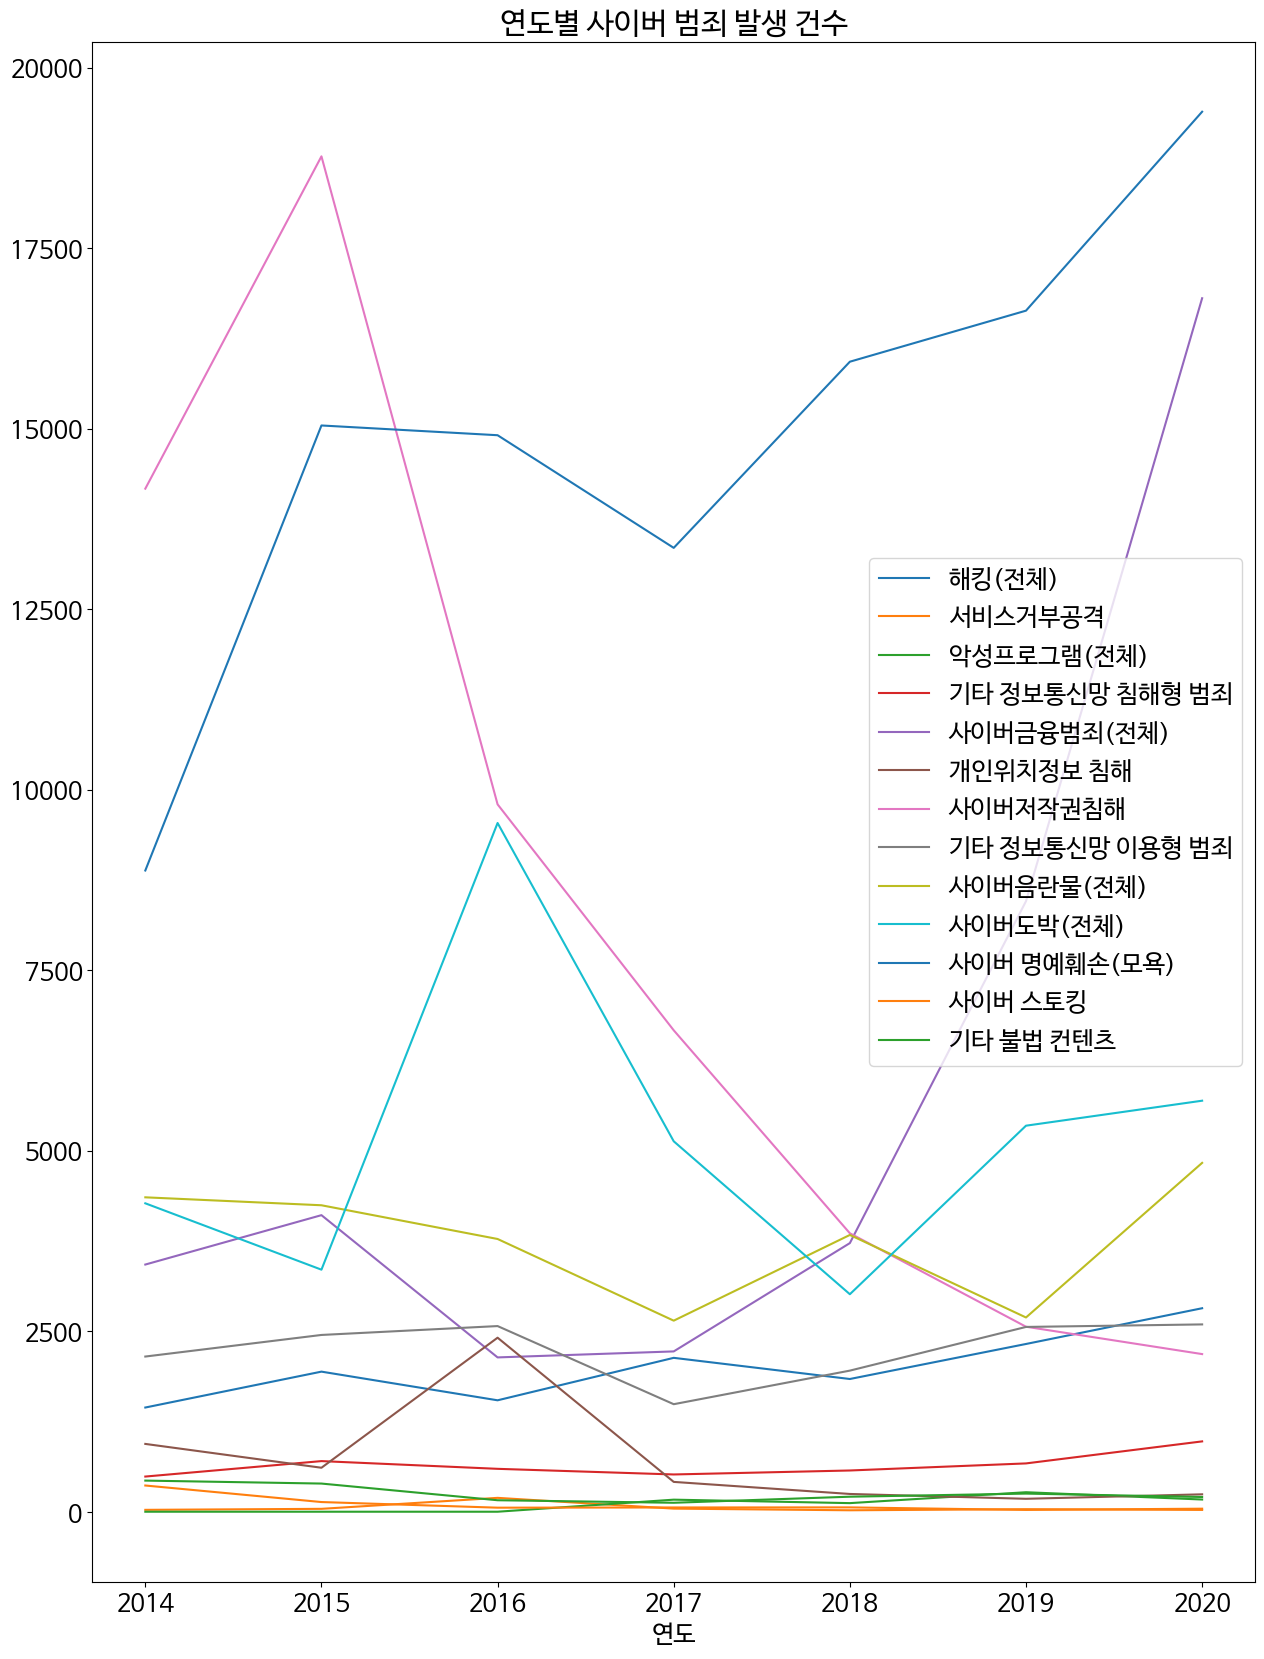

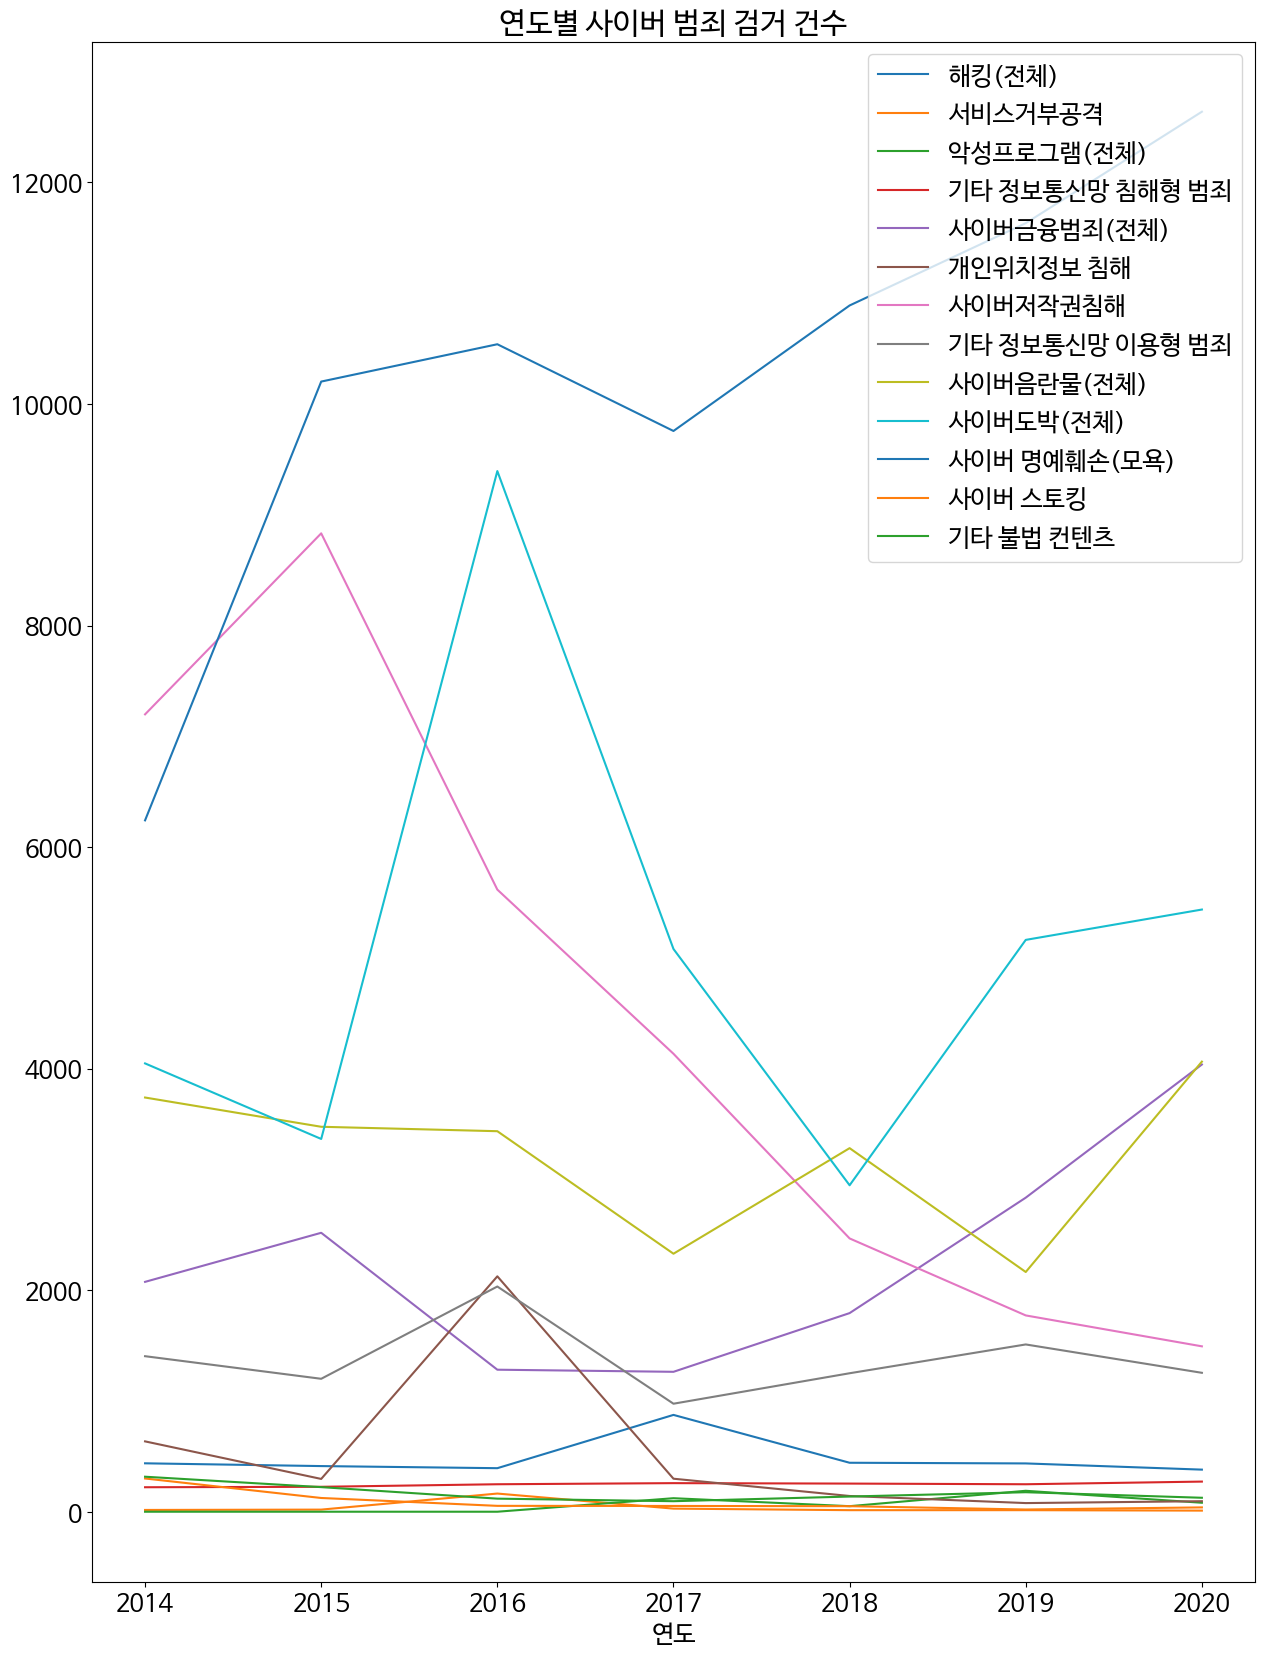

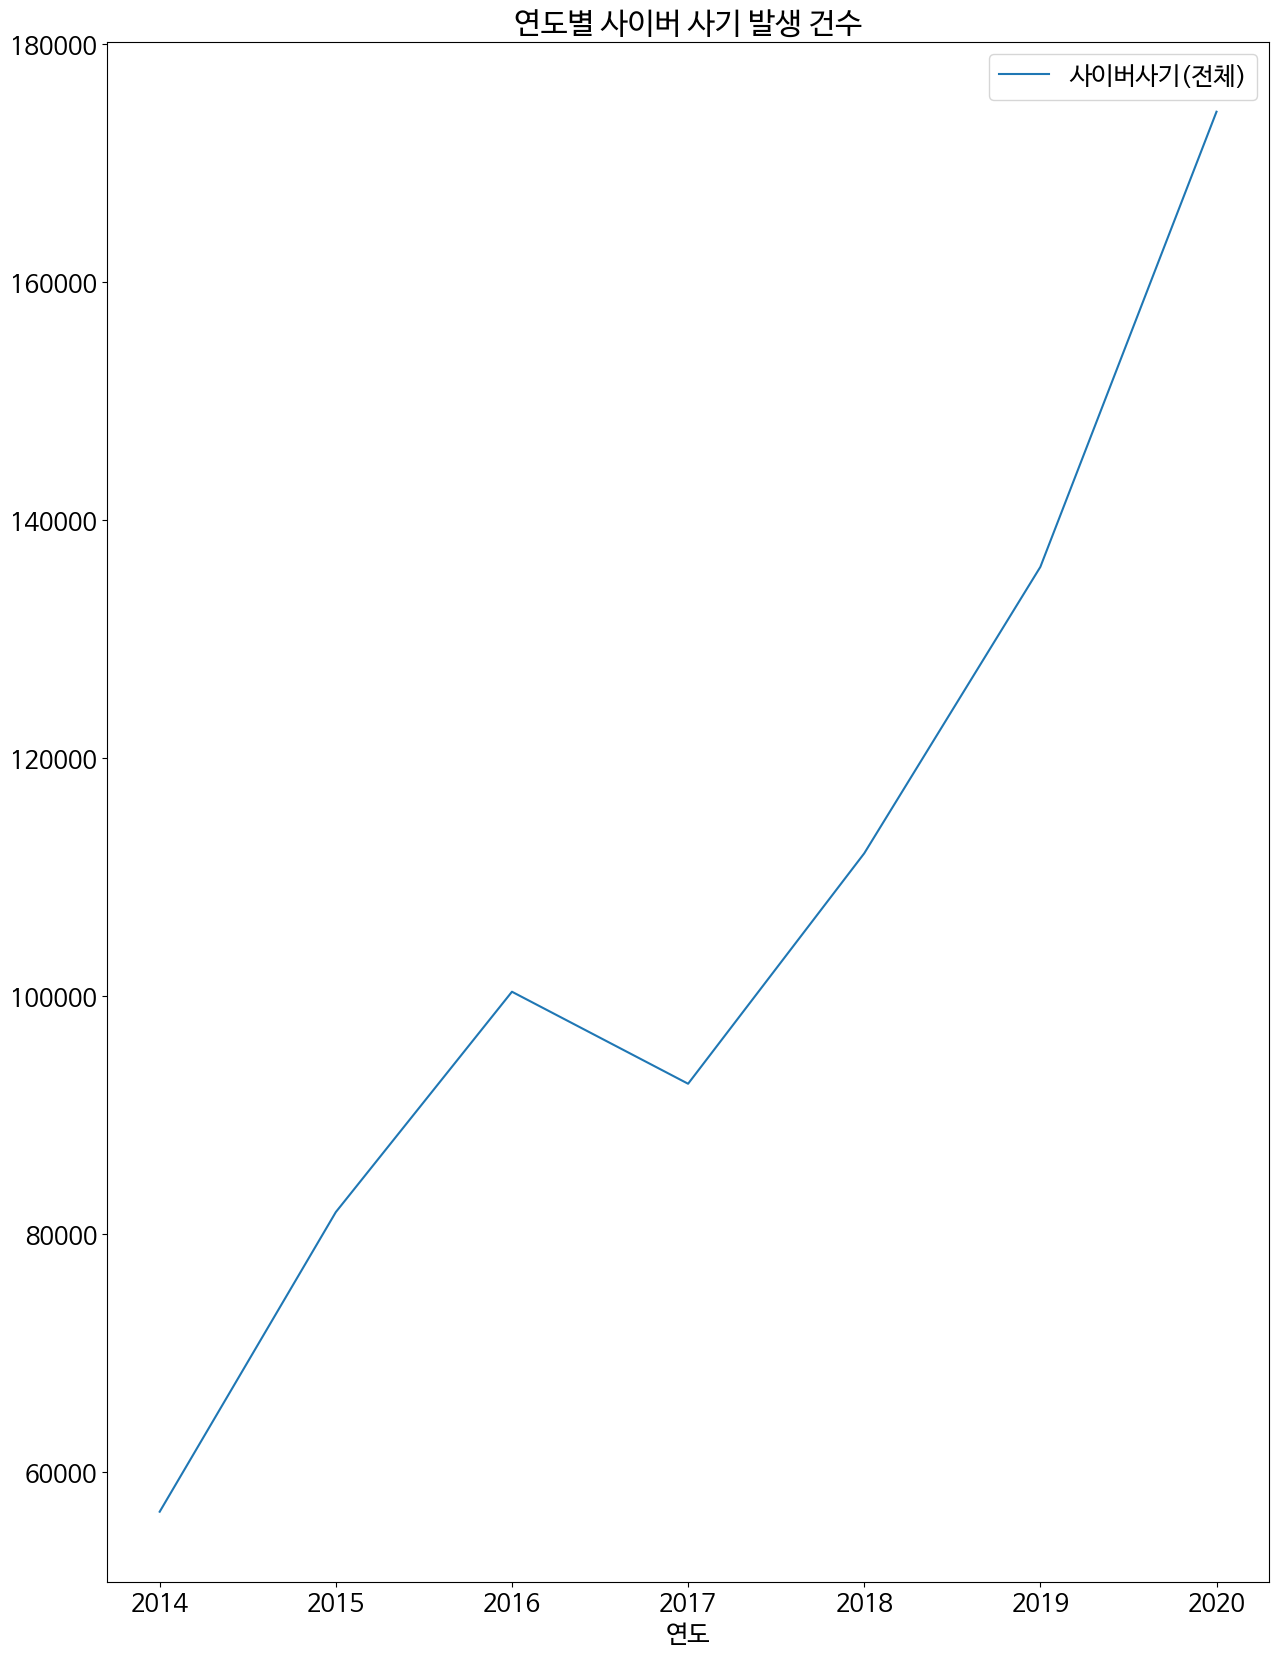

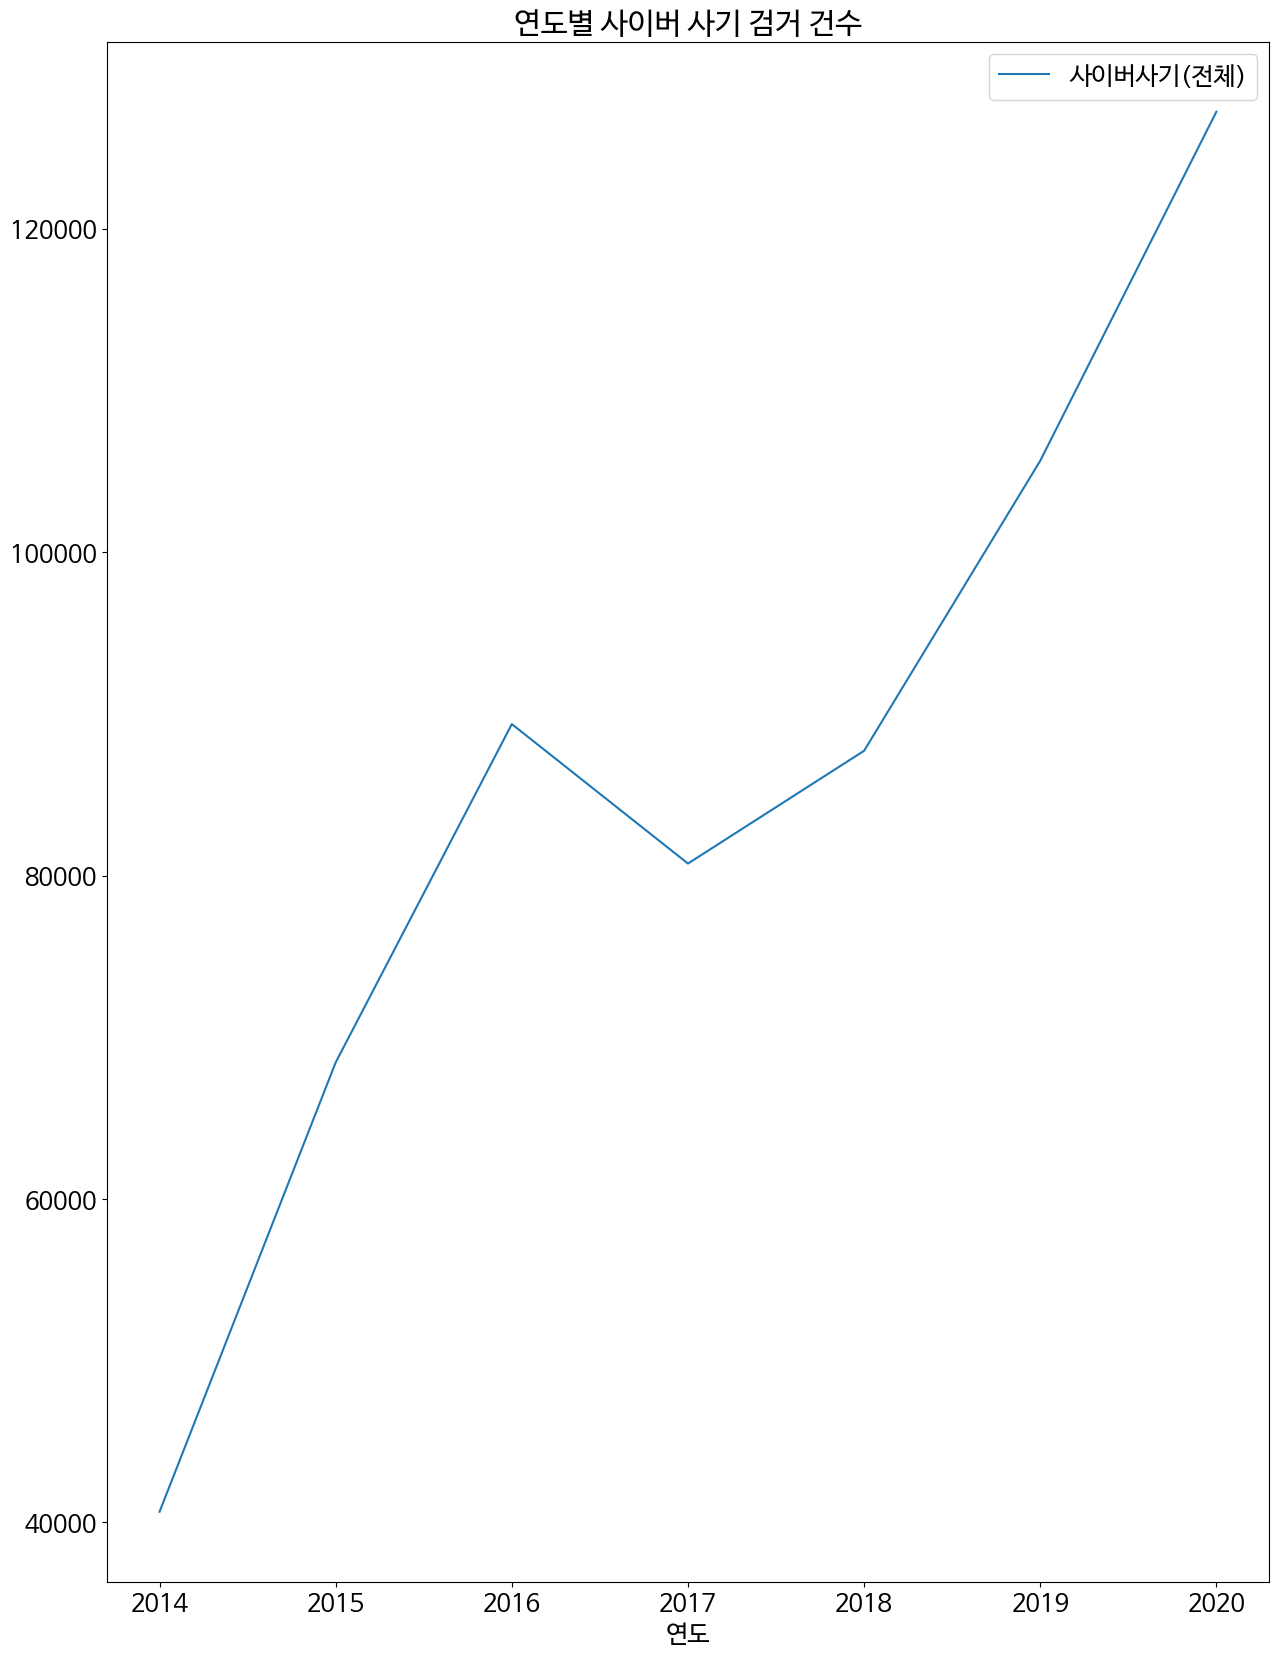

In [33]:

crime_df2.plot(title = '연도별 사이버 범죄 발생 건수', x = '연도', y = label, kind="line" ,figsize = (15,20))
crime_df3.plot(title = '연도별 사이버 범죄 검거 건수', x = '연도', y = label, kind="line" ,figsize = (15,20))
crime_df2.plot(title = '연도별 사이버 사기 발생 건수', x = '연도', y = label2, kind="line" ,figsize = (15,20))
crime_df3.plot(title = '연도별 사이버 사기 검거 건수', x = '연도', y = label2, kind="line" ,figsize = (15,20))

